# lorapy testing notebook 

In [1]:
%load_ext autoreload
%autoreload 2

import pathlib

import os, sys
from loguru import logger
logger.remove(None)
logger.add(sys.stdout, colorize=True)

import numpy as np

import matplotlib.pyplot as plt 
plt.style.use('dark_background')
%matplotlib inline

## setup 

In [2]:
DEADEND_DATA_DIR = '/Users/trevor/Work/1-projects/lora-processing/data/dead-end'

DATA_DIR = '/Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor'
DATA_DIR_PLIB = pathlib.Path('/Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor')

DATA_FILE = '/Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat'
DATA_FILE_PLIB = pathlib.Path('/Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat')

# data file loading 

In [3]:
from lorapy.io.load import DatLoader

## input path tests

### dead end dir

### data directory 

In [4]:
loader = DatLoader(DATA_DIR, autoload=True)

2020-04-04 18:18:40.902 | DEBUG    | lorapy.io.load:_process_data_dir:68 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor
2020-04-04 18:18:40.906 | INFO     | lorapy.io.load:_process_data_dir:74 - found 20 datafile file(s)


In [5]:
loader.data_file, loader.filelist

(DatFile('lora_BW9_SF8_915MHz_1Msps_L42.dat'),
 [DatFile('lora_BW9_SF8_915MHz_1Msps_L42.dat'),
  DatFile('lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW2_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW8_SF11_915_25MHz_1Msps_L37.dat'),
  DatFile('lora_BW8_SF10_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW9_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW2_SF10_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW9_SF10_915MHz_1Msps_L1.dat'),
  DatFile('lora_BW1_SF12_915MHz_1Msps_Att70_v3.dat'),
  DatFile('lora_BW7_SF11_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW1_SF11_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW1_SF10_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW7_SF10_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW2_SF11_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW8_SF11_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW1_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW7_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW1_SF8_914_75MHz_1Msps_L24.dat')

In [6]:
loader = DatLoader(DATA_DIR_PLIB, autoload=False)

2020-04-04 18:18:40.984 | DEBUG    | lorapy.io.load:_process_data_dir:68 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor
2020-04-04 18:18:40.986 | INFO     | lorapy.io.load:_process_data_dir:74 - found 20 datafile file(s)


### data file

#### `str` and `pathlib` 

In [7]:
loader = DatLoader(DATA_FILE, autoload=True)

2020-04-04 18:18:41.016 | INFO     | lorapy.io.load:_validate_data_path:58 - validated datafile file at /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat
2020-04-04 18:18:41.017 | DEBUG    | lorapy.io.load:_validate_data_path:61 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor


In [8]:
loader.data_file

DatFile('lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat')

In [9]:
loader = DatLoader(DATA_FILE_PLIB, autoload=False)

2020-04-04 18:18:41.085 | INFO     | lorapy.io.load:_validate_data_path:58 - validated datafile file at /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat
2020-04-04 18:18:41.086 | DEBUG    | lorapy.io.load:_validate_data_path:61 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor


# datafile handling

In [10]:
from lorapy.datafile.file import DatFile

## encoding tests

In [11]:
loader = DatLoader(DATA_FILE, autoload=True)

2020-04-04 18:18:41.149 | INFO     | lorapy.io.load:_validate_data_path:58 - validated datafile file at /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat
2020-04-04 18:18:41.150 | DEBUG    | lorapy.io.load:_validate_data_path:61 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor


### params

In [12]:
file = loader.data_file
file.load()
file.name

2020-04-04 18:18:41.179 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 16384 and packet length: 495616
2020-04-04 18:18:41.738 | INFO     | lorapy.datafile.file:load:61 - loaded 106771756 samples from file


'lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat'

In [13]:
file.bw, file.sf, file.att, file.samp_per_sym, file.packet_len

(8, 12, 80, 16384, 495616)

# lora signal

## convert to signal  

In [14]:
signal = file.to_signal()
signal

LoraSignal(length=106771756)

## extract packets

In [15]:
signal.extract_packets(method='slide-mean', auto_adj=True)

2020-04-04 18:18:41.834 | INFO     | lorapy.signals.signal:_process_signal:116 - selected "slide-mean" processing method
2020-04-04 18:18:42.082 | INFO     | lorapy.signals.processing.sliding_mean:_find_all_mindices:55 - scanning signal for padding locations..
2020-04-04 18:18:42.083 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 0
2020-04-04 18:18:42.150 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 50
2020-04-04 18:18:42.213 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 100
2020-04-04 18:18:42.276 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 150
2020-04-04 18:18:42.341 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 200
2020-04-04 18:18:42.361 | DEBUG    | lorapy.signals.processing.sliding_mean:_scan_slice:92 - reached end of signal
2020-04-04 18:18:42.362 | DEBUG    | lorapy.signals.proce

In [16]:
signal._raw_packets.shape, len(signal.packets)

((211, 495616), 211)

In [17]:
%store signal

Stored 'signal' (LoraSignal)


# lora packets

## packet attrs

In [23]:
packet = signal.packets[0]
packet

LoraPacket(id=0) || size: 495616 | BW: 8 | SF: 12 | Att: 80 | samples per symbol: 16384 | packet length: 495616

In [24]:
packet.size, packet.mean, packet.min, packet.max

(495616, 8.053982e-05, 0.0, 0.0002746611)

## plot

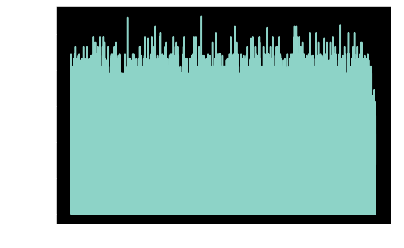

In [25]:
packet.plot()

## get padding adjustment

In [26]:
adjustment = packet.get_adjustment(look_ahead=100, threshold=0.5)
adjustment

2020-04-04 18:28:10.709 | DEBUG    | lorapy.packets.packet:biased_mean:63 - got biased packet [2118 / 495616] [0.00020 / 0.00008]
2020-04-04 18:28:10.712 | INFO     | lorapy.packets.packet:get_adjustment:53 - got final adjustment: 0


0

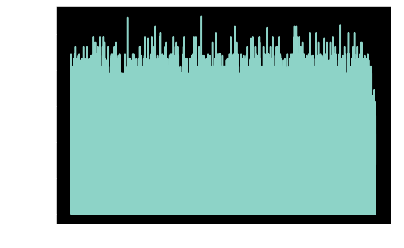

In [27]:
packet.plot(adjust=adjustment)

## check over adjusted packets